# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
import matplotlib.pyplot as plt

## Load dataset, Preprocessing

In [2]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [3]:
output_dim = nb_classes = 10

In [4]:
input_dim = (32,32,3)
X_train = X_train.reshape(50000, *input_dim)
X_test = X_test.reshape(10000, *input_dim)

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
print(input_dim, X_train.shape, Y_train.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) 10


## Build Model

In [42]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 16)       

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batch_size=128
epochs=100
history_3 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 378us/sample - loss: 1.9197 - accuracy: 0.3043 - val_loss: 1.6747 - val_accuracy: 0.4021
Epoch 2/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.5220 - accuracy: 0.4529 - val_loss: 1.5336 - val_accuracy: 0.4463
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.4061 - accuracy: 0.4974 - val_loss: 1.4946 - val_accuracy: 0.4629
Epoch 4/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3418 - accuracy: 0.5232 - val_loss: 1.3423 - val_accuracy: 0.5206
Epoch 5/100
50000/50000 [==============================] - 17s 346us/sample - loss: 1.2990 - accuracy: 0.5405 - val_loss: 1.4571 - val_accuracy: 0.4978
Epoch 6/100
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2652 - accuracy: 0.5515 - val_loss: 1.4092 - val_accuracy: 0.5031
Epoch 7/100
50000/50000 [=============

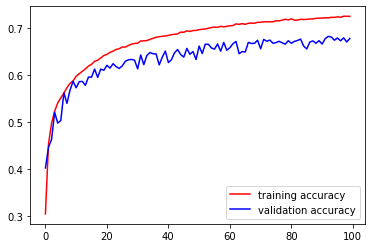

In [46]:
plt.plot(history_3.history['accuracy'],'r')
plt.plot(history_3.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

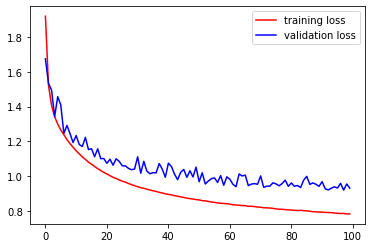

In [47]:
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_3 = model.predict_classes(X_test)

## arch 2 300 epochs

In [8]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)       

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
batch_size=128
epochs=300
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 22s 448us/sample - loss: 1.9190 - accuracy: 0.2953 - val_loss: 1.9425 - val_accuracy: 0.3338
Epoch 2/300
50000/50000 [==============================] - 18s 351us/sample - loss: 1.5718 - accuracy: 0.4232 - val_loss: 1.5354 - val_accuracy: 0.4393
Epoch 3/300
50000/50000 [==============================] - 17s 349us/sample - loss: 1.4516 - accuracy: 0.4720 - val_loss: 1.4723 - val_accuracy: 0.4747
Epoch 4/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3732 - accuracy: 0.5047 - val_loss: 1.4062 - val_accuracy: 0.4964
Epoch 5/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3213 - accuracy: 0.5268 - val_loss: 1.3952 - val_accuracy: 0.5083
Epoch 6/300
50000/50000 [==============================] - 18s 350us/sample - loss: 1.2808 - accuracy: 0.5421 - val_loss: 1.3266 - val_accuracy: 0.5262
Epoch 7/300
50000/50000 [=============

50000/50000 [==============================] - 17s 343us/sample - loss: 0.7601 - accuracy: 0.7318 - val_loss: 0.9367 - val_accuracy: 0.6804
Epoch 108/300
50000/50000 [==============================] - 17s 340us/sample - loss: 0.7607 - accuracy: 0.7346 - val_loss: 0.9398 - val_accuracy: 0.6739
Epoch 109/300
50000/50000 [==============================] - 17s 338us/sample - loss: 0.7571 - accuracy: 0.7337 - val_loss: 0.9304 - val_accuracy: 0.6790
Epoch 110/300
50000/50000 [==============================] - 17s 338us/sample - loss: 0.7582 - accuracy: 0.7347 - val_loss: 0.9498 - val_accuracy: 0.6729
Epoch 111/300
50000/50000 [==============================] - 17s 346us/sample - loss: 0.7586 - accuracy: 0.7329 - val_loss: 0.9182 - val_accuracy: 0.6844
Epoch 112/300
50000/50000 [==============================] - 17s 341us/sample - loss: 0.7565 - accuracy: 0.7340 - val_loss: 0.9493 - val_accuracy: 0.6747
Epoch 113/300
50000/50000 [==============================] - 17s 339us/sample - loss: 0.75

50000/50000 [==============================] - 17s 346us/sample - loss: 0.7112 - accuracy: 0.7527 - val_loss: 0.9578 - val_accuracy: 0.6820
Epoch 214/300
50000/50000 [==============================] - 17s 339us/sample - loss: 0.7117 - accuracy: 0.7508 - val_loss: 0.9686 - val_accuracy: 0.6698
Epoch 215/300
50000/50000 [==============================] - 18s 351us/sample - loss: 0.7089 - accuracy: 0.7534 - val_loss: 0.9224 - val_accuracy: 0.6812
Epoch 216/300
50000/50000 [==============================] - 17s 347us/sample - loss: 0.7102 - accuracy: 0.7515 - val_loss: 0.9127 - val_accuracy: 0.6895
Epoch 217/300
50000/50000 [==============================] - 17s 339us/sample - loss: 0.7106 - accuracy: 0.7516 - val_loss: 0.9219 - val_accuracy: 0.6908
Epoch 218/300
50000/50000 [==============================] - 17s 337us/sample - loss: 0.7093 - accuracy: 0.7524 - val_loss: 0.9290 - val_accuracy: 0.6824
Epoch 219/300
50000/50000 [==============================] - 17s 344us/sample - loss: 0.70

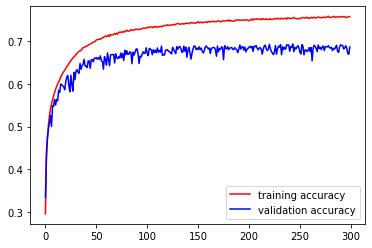

In [15]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

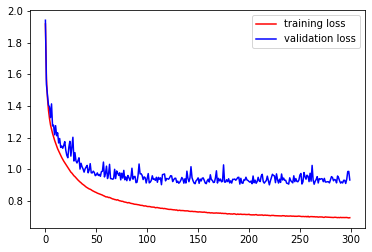

In [16]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [17]:
predictions = model.predict_classes(X_test)

In [35]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import numpy as np

# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

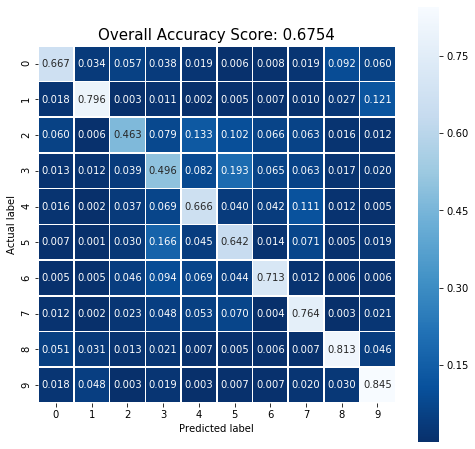

In [36]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 4 delete layer 256

In [25]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 30,30
model.add(MaxPooling2D(pool_size=(2,2)))

# 15,15
model.add(Convolution2D(24,1, activation='relu'))

# 15,15
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 15,15
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

# 13,13
model.add(MaxPooling2D(pool_size=(2,2)))

# 4,4
model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))


In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 15, 15, 64)       

In [27]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# ## STOPPED
# batch_size=128
# epochs=100
# history = model.fit(X_train, Y_train,
#                     batch_size=batch_size, epochs=epochs,
#                     verbose=1, validation_data=(X_test, Y_test))
# score = model.evaluate(X_test, Y_test, verbose=0) 
# print('Test error:', score[0]) 
# print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.5707 - accuracy: 0.4371 - val_loss: 1.4798 - val_accuracy: 0.4728
Epoch 2/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1755 - accuracy: 0.5827 - val_loss: 1.2134 - val_accuracy: 0.5582
Epoch 3/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.0236 - accuracy: 0.6375 - val_loss: 1.1094 - val_accuracy: 0.5993
Epoch 4/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.9239 - accuracy: 0.6770 - val_loss: 1.0829 - val_accuracy: 0.6239
Epoch 5/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8524 - accuracy: 0.7021 - val_loss: 1.0055 - val_accuracy: 0.6410
Epoch 6/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7915 - accuracy: 0.7231 - val_loss: 0.9609 - val_accuracy: 0.6645
Epoch 7/100
50000/50000 [=========================

KeyboardInterrupt: 

In [28]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.6073 - accuracy: 0.4601 - val_loss: 1.4199 - val_accuracy: 0.4876
Epoch 2/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1500 - accuracy: 0.5956 - val_loss: 1.1659 - val_accuracy: 0.5897
Epoch 3/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.9963 - accuracy: 0.6505 - val_loss: 1.2211 - val_accuracy: 0.5759
Epoch 4/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8924 - accuracy: 0.6897 - val_loss: 1.0989 - val_accuracy: 0.6255
Epoch 5/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8149 - accuracy: 0.7159 - val_loss: 1.0910 - val_accuracy: 0.6395
Epoch 6/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.7516 - accuracy: 0.7393 - val_loss: 1.0250 - val_accuracy: 0.6491
Epoch 7/100
50000/50000 [=========================

KeyboardInterrupt: 

## arch 6 delete layer & add channel

In [29]:
model = Sequential()

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

# 16,16
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

# 14,14
model.add(MaxPooling2D(pool_size=(2,2)))

# 7,7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))


In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 1, 10)         

In [31]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 520us/sample - loss: 1.5624 - accuracy: 0.4721 - val_loss: 1.3985 - val_accuracy: 0.5192
Epoch 2/100
50000/50000 [==============================] - 24s 485us/sample - loss: 1.1499 - accuracy: 0.6020 - val_loss: 1.5841 - val_accuracy: 0.4836
Epoch 3/100
50000/50000 [==============================] - 24s 484us/sample - loss: 1.0285 - accuracy: 0.6455 - val_loss: 1.2650 - val_accuracy: 0.5653
Epoch 4/100
50000/50000 [==============================] - 24s 484us/sample - loss: 0.9511 - accuracy: 0.6702 - val_loss: 1.1804 - val_accuracy: 0.6058
Epoch 5/100
50000/50000 [==============================] - 24s 483us/sample - loss: 0.8949 - accuracy: 0.6927 - val_loss: 1.2007 - val_accuracy: 0.5947
Epoch 6/100
50000/50000 [==============================] - 24s 483us/sample - loss: 0.8524 - accuracy: 0.7054 - val_loss: 1.3301 - val_accuracy: 0.5674
Epoch 7/100
50000/50000 [=============

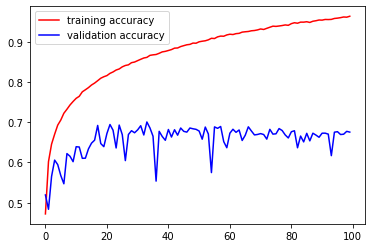

In [33]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

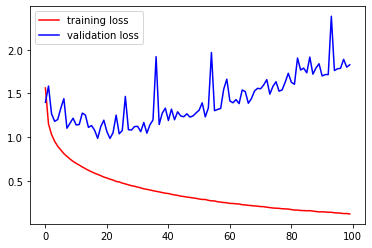

In [34]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [37]:
predictions_2 = model.predict_classes(X_test)

In [38]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions_2)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

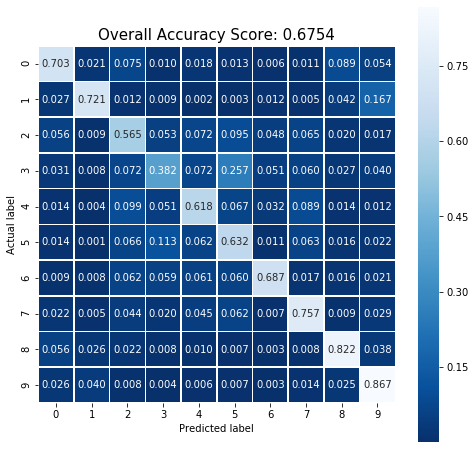

In [40]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('CNN_DEC13_ARCH6.png')
plt.show();